The following analysis will be looking at the availability of Farmers Markets in the United States.
The accesibility to healthy food via Farmers Market will be the main focus on this project. 

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [4]:
fm = pd.read_csv("farmersMarkets.csv")

In [6]:
fm.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1012063,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,Y,N,Y,N,N,6/28/2016 12:10:09 PM
1,1011871,Stearns Homestead Farmers' Market,http://Stearnshomestead.com,NaN,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,Y,N,N,4/9/2016 8:05:17 PM
2,1011878,100 Mile Market,http://www.pfcmarkets.com,https://www.facebook.com/100MileMarket/?fref=ts,NaN,NaN,https://www.instagram.com/100milemarket/,507 Harrison St,Kalamazoo,Kalamazoo,...,N,N,Y,N,N,N,N,N,N,7/15/2016 7:20:33 PM
3,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
4,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49:46 AM


In [5]:
fm.tail()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
8650,1004767,Zia Bernalillo Farmers' Market,http://www.eatfreshnm.org/,https://www.facebook.com/farmersmarketsnm?ref=hl,NaN,NaN,NaN,335 S. Camino del Pueblo,Bernalillo,Sandoval,...,N,Y,Y,N,N,N,N,N,N,6/5/2014 2:40:25 PM
8651,1000778,Zimmerman Farmers Market,http://www.pzfarmersmarket.org,princeton-zimerman farmers market,NaN,NaN,NaN,"Lions Park, Main Street",Zimmerman,Sherburne,...,N,N,Y,N,Y,N,N,N,N,6/27/2016 3:44:36 PM
8652,1012380,Zion Canyon Farmers Market,http://zionharvest.org,https://www.facebook.com/ZionCanyonFarmersMarket/,NaN,NaN,NaN,1212 Zion Park Blvd.,Springdale,Washington,...,Y,N,Y,N,N,Y,N,N,N,7/9/2016 5:00:07 PM
8653,1004686,Zionsville Farmers Market,http://www.zionsvillefarmersmarket.org,NaN,NaN,NaN,NaN,Hawthorne & Main Street,Zionsville,Boone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
8654,1011418,Zona Rosa Farmers' Market,NaN,NaN,NaN,NaN,NaN,Off of I-29 and Barry Road,Kansas City,Platte,...,N,N,Y,N,N,N,N,N,N,9/4/2015 9:48:39 AM


In [9]:
fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8655 entries, 0 to 8654
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FMID           8655 non-null   int64  
 1   MarketName     8655 non-null   object 
 2   Website        5202 non-null   object 
 3   Facebook       3795 non-null   object 
 4   Twitter        996 non-null    object 
 5   Youtube        161 non-null    object 
 6   OtherMedia     636 non-null    object 
 7   street         8372 non-null   object 
 8   city           8615 non-null   object 
 9   County         8118 non-null   object 
 10  State          8655 non-null   object 
 11  zip            7714 non-null   object 
 12  Season1Date    5386 non-null   object 
 13  Season1Time    5519 non-null   object 
 14  Season2Date    429 non-null    object 
 15  Season2Time    414 non-null    object 
 16  Season3Date    78 non-null     object 
 17  Season3Time    74 non-null     object 
 18  Season4D

# Data Preparation

In [ ]:
#new dataframe was created to only have relevant columns for analysis 

In [20]:
fm = fm[['MarketName','State','x','y']]

In [23]:
fm.head()

,MarketName,State,x,y
0,Caledonia Farmers Market Association - Danville,Vermont,-72.140305,44.411013
1,Stearns Homestead Farmers' Market,Ohio,-81.728597,41.375118
2,100 Mile Market,Michigan,-85.574887,42.296024
3,106 S. Main Street Farmers Market,South Carolina,-82.818700,34.804200
4,10th Steet Community Farmers Market,Missouri,-94.274619,37.495628


In [25]:
# dropping null values
fm.dropna(subset=['x','y'],axis=0,inplace=True)
fm.isnull().sum()

MarketName    0
State         0
x             0
y             0
dtype: int64

In [26]:
fm.head()

,MarketName,State,x,y
0,Caledonia Farmers Market Association - Danville,Vermont,-72.140305,44.411013
1,Stearns Homestead Farmers' Market,Ohio,-81.728597,41.375118
2,100 Mile Market,Michigan,-85.574887,42.296024
3,106 S. Main Street Farmers Market,South Carolina,-82.818700,34.804200
4,10th Steet Community Farmers Market,Missouri,-94.274619,37.495628


In [28]:
fm.tail()

,MarketName,State,x,y
8650,Zia Bernalillo Farmers' Market,New Mexico,-106.546840,35.313704
8651,Zimmerman Farmers Market,Minnesota,-93.585014,45.437700
8652,Zion Canyon Farmers Market,Utah,-113.004938,37.181501
8653,Zionsville Farmers Market,Indiana,-86.261200,39.949100
8654,Zona Rosa Farmers' Market,Missouri,-94.580864,39.246317


In [30]:
number_per_state = pd.DataFrame(fm['State'].value_counts())
number_per_state.columns = ['Number of Farmers Markets by State']
number_per_state.sort_values('Number of Farmers Markets by State').tail()

,Number of Farmers Markets by State
Illinois,326
Ohio,336
Michigan,340
New York,669
California,760


In [31]:
number_per_state.sort_values('Number of Farmers Markets by State').head()

,Number of Farmers Markets by State
Virgin Islands,4
Delaware,36
Alaska,38
Nevada,39
Rhode Island,40


In [55]:
state_farms = pd.DataFrame(fm['State'].value_counts())
state_farms.head()
state_farms.rename(columns={'State':'Number of farmers markets'}, inplace = True)

px.bar(state_farms, x=state_farms.index, y='Number of farmers markets')

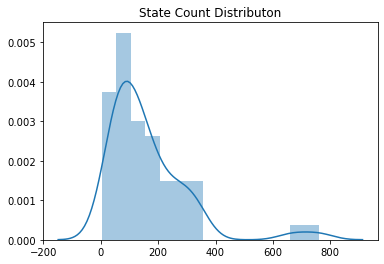

In [54]:
sns.distplot(state_farms, bins=15).set_title('State Count Distributon')
plt.show()

# Observations

The majority of the data shows that Farmers Markets are more prominent in California, New York, and Michigan.
The distribtuion of the fm by state is right skewed. 
Right skewed meanst that it is positively skewed and mean is greater than the median.